In [38]:
import tensorflow as tf
import pandas as pd
import sys
import numpy as np
numpy.set_printoptions(threshold=sys.maxsize)
from keras.datasets import imdb
from keras.preprocessing import sequence

In [2]:
(x_train, y_train), (x_test, y_test) =imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

In [39]:
print(x_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [4]:
print(x_test[0])
print(y_test[0])

[1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 7944, 451, 202, 14, 6, 717]
0


In [12]:
# number of classes
uniq, freq = np.unique(y_train,return_counts=True)
print('No of Classes ',uniq)
print('Value counts',freq)

# Data is balanced

No of Classes  [0 1]
Value counts [12500 12500]


In [33]:
uniq, freq = np.unique(Ytest,return_counts=True)
print('No of Classes ',uniq)
print('Value counts',freq)

No of Classes  [0 1]
Value counts [12500 12500]


In [13]:
print("train_data ", x_train.shape)
print("train_labels ", y_train.shape)

print("test_data ", x_test.shape)
print("test_labels ", y_test.shape)

train_data  (25000,)
train_labels  (25000,)
test_data  (25000,)
test_labels  (25000,)


In [14]:
# we have maximum 10000 words with 9999 index for a word
max([max(i) for i in x_train])

9999

In [15]:
# maximum lenght of a sentence
max([len(i) for i in x_train])

2494

In [76]:
word_index = imdb.get_word_index()

In [77]:
len(word_index)

88584

In [42]:
# Reverse the key,value pair of word index to decode
decode = dict([(val,key) for key,val in word_index.items()])

In [43]:
print(x_train[0])
print([decode[i] for i in x_train[0]])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
['the', 'as', 'you', 'with', 'out', 'themselves', 'powerful'

In [44]:
print(x_test[1])
print([decode[i] for i in x_test[1]])

[1, 14, 22, 3443, 6, 176, 7, 5063, 88, 12, 2679, 23, 1310, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 7216, 2, 4, 8463, 2801, 109, 1603, 21, 4, 22, 3861, 8, 6, 1193, 1330, 10, 10, 4, 105, 987, 35, 841, 2, 19, 861, 1074, 5, 1987, 2, 45, 55, 221, 15, 670, 5304, 526, 14, 1069, 4, 405, 5, 2438, 7, 27, 85, 108, 131, 4, 5045, 5304, 3884, 405, 9, 3523, 133, 5, 50, 13, 104, 51, 66, 166, 14, 22, 157, 9, 4, 530, 239, 34, 8463, 2801, 45, 407, 31, 7, 41, 3778, 105, 21, 59, 299, 12, 38, 950, 5, 4521, 15, 45, 629, 488, 2733, 127, 6, 52, 292, 17, 4, 6936, 185, 132, 1988, 5304, 1799, 488, 2693, 47, 6, 392, 173, 4, 2, 4378, 270, 2352, 4, 1500, 7, 4, 65, 55, 73, 11, 346, 14, 20, 9, 6, 976, 2078, 7, 5293, 861, 2, 5, 4182, 30, 3127, 2, 56, 4, 841, 5, 990, 692, 8, 4, 1669, 398, 229, 10, 10, 13, 2822, 670, 5304, 14, 9, 31, 7, 27, 111, 108, 15, 2033, 19, 7836, 1429, 875, 551, 14, 22, 9, 1193, 21, 45, 4829, 5, 45, 252, 8, 2, 6, 565, 921, 3639, 39, 4, 529, 48, 25, 181, 8

In [45]:
max_len = 20
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout,Embedding,Flatten,LeakyReLU,Embedding
from tensorflow.keras.regularizers import l1

In [57]:
model = Sequential()
model.add(Embedding(input_dim=10000,output_dim=50,input_length=max_len))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [58]:
NumEpochs = 5
BatchSize = 32

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, epochs=NumEpochs, batch_size=BatchSize, validation_data=(x_test, y_test))

Epoch 1/5
782/782 [==============================] - 4s 4ms/step - loss: 0.6475 - acc: 0.6122 - val_loss: 0.5251 - val_acc: 0.7416
Epoch 2/5
782/782 [==============================] - 3s 4ms/step - loss: 0.4965 - acc: 0.7770 - val_loss: 0.4828 - val_acc: 0.7608
Epoch 3/5
782/782 [==============================] - 3s 4ms/step - loss: 0.4119 - acc: 0.8328 - val_loss: 0.4930 - val_acc: 0.7558
Epoch 4/5
782/782 [==============================] - 3s 4ms/step - loss: 0.3329 - acc: 0.8764 - val_loss: 0.5637 - val_acc: 0.7452
Epoch 5/5
782/782 [==============================] - 3s 4ms/step - loss: 0.2461 - acc: 0.9161 - val_loss: 0.6759 - val_acc: 0.7282


In [59]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 20, 50)            500000    
_________________________________________________________________
flatten_4 (Flatten)          (None, 1000)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 16)                16016     
_________________________________________________________________
dropout_10 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_11 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                

In [105]:
pred = model.predict(np.array([x_test[1]]))[0][0]
print('Actual Class : ',y_test[1])
print('Predicted Class : ',pred)


Actual Class :  1
Predicted Class :  0.9670016


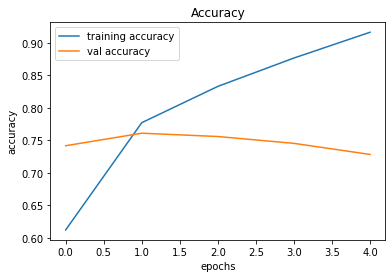

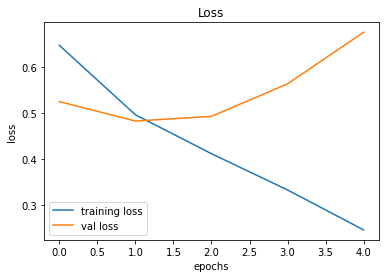

In [107]:
#Display of the accuracy and the loss values
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history.history['acc'], label='training accuracy')
plt.plot(history.history['val_acc'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()